In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
california=datasets.fetch_california_housing()
x=california.data
y=california.target

In [3]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [4]:
cov_matrix=np.cov(x_scaled.T)
print(cov_matrix)
eigenvalues,eigenvectors=np.linalg.eig(cov_matrix)
print("eigenvalues:",eigenvalues)
print("eigenvectors:",eigenvectors)

[[ 1.00004845 -0.11903976  0.32691127 -0.06204314  0.00483458  0.01876716
  -0.07981299 -0.0151766 ]
 [-0.11903976  1.00004845 -0.15328485 -0.07775105 -0.29625859  0.013192
   0.01117321 -0.10820206]
 [ 0.32691127 -0.15328485  1.00004845  0.84766239 -0.07221635 -0.00485253
   0.10639412 -0.02754139]
 [-0.06204314 -0.07775105  0.84766239  1.00004845 -0.06620061 -0.0061815
   0.06972451  0.01334504]
 [ 0.00483458 -0.29625859 -0.07221635 -0.06620061  1.00004845  0.06986612
  -0.10879002  0.09977806]
 [ 0.01876716  0.013192   -0.00485253 -0.0061815   0.06986612  1.00004845
   0.0023663   0.00247594]
 [-0.07981299  0.01117321  0.10639412  0.06972451 -0.10879002  0.0023663
   1.00004845 -0.92470924]
 [-0.0151766  -0.10820206 -0.02754139  0.01334504  0.09977806  0.00247594
  -0.92470924  1.00004845]]
eigenvalues: [2.02704763 1.88139074 0.04558733 0.08160574 0.65941198 1.27115235
 1.03108764 1.0031042 ]
eigenvectors: [[-0.07746229  0.22987873  0.24227053  0.16923764 -0.14981849  0.21822239
   

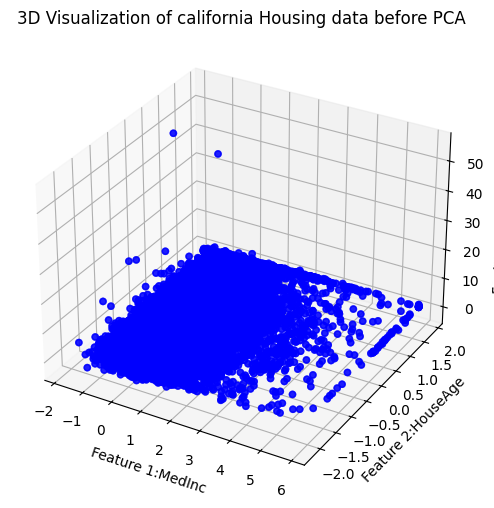

In [7]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection='3d')
colors=['red','green','blue']
for i in range(len(colors)):
    ax.scatter(x_scaled[:,0],x_scaled[:,1],x_scaled[:,2],color='blue',alpha=0.5)
ax.set_xlabel('Feature 1:MedInc')
ax.set_ylabel('Feature 2:HouseAge')
ax.set_zlabel('Feature 3:AveRooms')
ax.set_title('3D Visualization of california Housing data before PCA')
plt.show()

Singular Values: [204.53908207 197.05335203 161.97318721 145.87877747 143.88560597
 116.66020679  41.03974696  30.67371817]
Explained Variance by PC1:0.25
Explained Variance by PC2:0.24


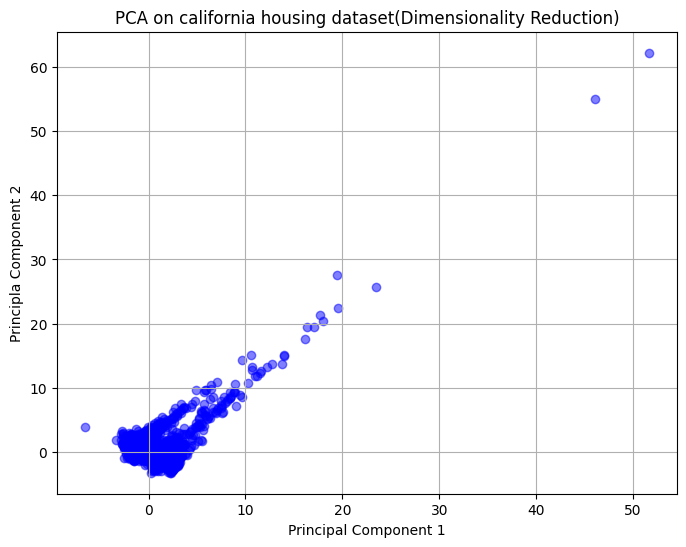

In [8]:
u,s,vt=np.linalg.svd(x_scaled,full_matrices=False)
print("Singular Values:",s)
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaled)
explained_variance=pca.explained_variance_ratio_
print(f"Explained Variance by PC1:{explained_variance[0]:.2f}")
print(f"Explained Variance by PC2:{explained_variance[1]:.2f}")
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],color='blue',alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principla Component 2')
plt.title('PCA on california housing dataset(Dimensionality Reduction)')
plt.grid()
plt.show()  

In [ ]:
fig=plt.figure(figsize=(8,6))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x_scaled[:,0],x_scaled[:,1],x_scaled[:,2],color='blue',alpha=0.5)
for i in range(3):
    ax.quiver(0,0,0,eigenvectors[i,0],eigenvectors[i,1],eigenvectors[i,2],color='black',length=1)
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')
ax.set_title('3D Data with Eigenvectors(California Housi')
plt.legend()
plt.show()